# Heart Failure Prediction

- To establish a model to predict heart failure 
 

## Data source

https://www.kaggle.com/fedesoriano/heart-failure-prediction


## Overview


__Attribute Information__

**Age:** age of the patient [years]

**Sex:** sex of the patient [M: Male, F: Female]

**ChestPainType:** chest pain type [TA: Typical Angina, ATA: Atypical Angina, NAP: Non-Anginal Pain, ASY: Asymptomatic]

**RestingBP:** resting blood pressure [mm Hg]

**Cholesterol:** serum cholesterol [mm/dl]

**FastingBS:** fasting blood sugar [1: if FastingBS > 120 mg/dl, 0: otherwise]

**RestingECG:** resting electrocardiogram results [Normal: Normal, ST: having ST-T wave abnormality (T wave inversions and/or ST elevation or depression of > 0.05 mV), LVH: showing probable or definite left ventricular hypertrophy by Estes' criteria]

**MaxHR:** maximum heart rate achieved [Numeric value between 60 and 202]

**ExerciseAngina:** exercise-induced angina [Y: Yes, N: No]

**Oldpeak:** oldpeak = ST [Numeric value measured in depression]

**ST_Slope:** the slope of the peak exercise ST segment [Up: upsloping, Flat: flat, Down: downsloping]

**HeartDisease:** output class [1: heart disease, 0: Normal]




# Loading libraries and data

In [2]:
# Load data from Google drive (for using colab )

from google.colab import drive
drive.mount('/content/drive') 

Mounted at /content/drive


In [3]:
# Change the path

!ls "/content/drive/MyDrive/Colab Notebooks/Projects/Heart_Failure_Prediction"

 heart.csv  'Heart Failure Prediction.ipynb'   README.md


In [4]:
# Data wrangling
import numpy as np
import pandas as pd


# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

# Machine learning
from sklearn.decomposition import PCA

from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score, f1_score
from imblearn.over_sampling import RandomOverSampler

from sklearn.preprocessing import StandardScaler, PolynomialFeatures, OneHotEncoder, StandardScaler, PowerTransformer, MinMaxScaler, LabelEncoder, RobustScaler
from sklearn.model_selection import RepeatedStratifiedKFold, KFold, cross_val_predict, train_test_split, GridSearchCV, cross_val_score, cross_validate
from sklearn.linear_model import LinearRegression, Lasso, Ridge, ElasticNet
from sklearn.metrics import plot_confusion_matrix, r2_score, mean_absolute_error, mean_squared_error, classification_report
from sklearn.metrics import make_scorer, precision_recall_curve, plot_precision_recall_curve, plot_roc_curve, roc_auc_score, roc_curve  

from sklearn.pipeline import make_pipeline, Pipeline
from sklearn.compose import make_column_transformer

from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier, GradientBoostingRegressor, ExtraTreesRegressor,GradientBoostingClassifier, AdaBoostClassifier
from sklearn.feature_selection import SelectKBest, SelectPercentile, f_classif, f_regression, mutual_info_regression

from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsRegressor,KNeighborsClassifier

from sklearn.svm import SVR, SVC

from xgboost import XGBRegressor, XGBClassifier
from xgboost import plot_importance

from sklearn.tree import plot_tree, DecisionTreeClassifier
from sklearn.impute import SimpleImputer, KNNImputer

from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.naive_bayes import GaussianNB




- heart

In [5]:
# Load raw data
heart = pd.read_csv("/content/drive/MyDrive/Colab Notebooks/Projects/Heart_Failure_Prediction/heart.csv")

In [6]:
heart.head(5)

,Age,Sex,ChestPainType,RestingBP,Cholesterol,FastingBS,RestingECG,MaxHR,ExerciseAngina,Oldpeak,ST_Slope,HeartDisease
0,40,M,ATA,140,289,0,Normal,172,N,0.0,Up,0
1,49,F,NAP,160,180,0,Normal,156,N,1.0,Flat,1
2,37,M,ATA,130,283,0,ST,98,N,0.0,Up,0
3,48,F,ASY,138,214,0,Normal,108,Y,1.5,Flat,1
4,54,M,NAP,150,195,0,Normal,122,N,0.0,Up,0


In [7]:
heart.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,918.0,53.510893,9.432617,28.0,47.00,54.0,60.0,77.0
RestingBP,918.0,132.396514,18.514154,0.0,120.00,130.0,140.0,200.0
Cholesterol,918.0,198.799564,109.384145,0.0,173.25,223.0,267.0,603.0
FastingBS,918.0,0.233115,0.423046,0.0,0.00,0.0,0.0,1.0
MaxHR,918.0,136.809368,25.460334,60.0,120.00,138.0,156.0,202.0
Oldpeak,918.0,0.887364,1.066570,-2.6,0.00,0.6,1.5,6.2
HeartDisease,918.0,0.553377,0.497414,0.0,0.00,1.0,1.0,1.0


In [8]:
columns = heart.columns
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Age             918 non-null    int64  
 1   Sex             918 non-null    object 
 2   ChestPainType   918 non-null    object 
 3   RestingBP       918 non-null    int64  
 4   Cholesterol     918 non-null    int64  
 5   FastingBS       918 non-null    int64  
 6   RestingECG      918 non-null    object 
 7   MaxHR           918 non-null    int64  
 8   ExerciseAngina  918 non-null    object 
 9   Oldpeak         918 non-null    float64
 10  ST_Slope        918 non-null    object 
 11  HeartDisease    918 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 86.2+ KB


# Exploratory Data Analysis

- overview data type in features
- handle object to one hot encoding


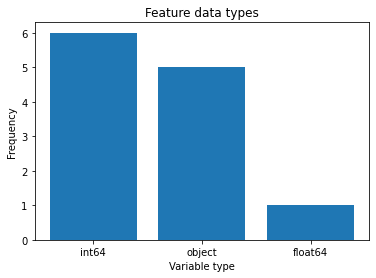

In [9]:
plt.bar([str(x) for x in heart.dtypes.value_counts().index], heart.dtypes.value_counts())
plt.ylabel("Frequency")
plt.xlabel("Variable type")
plt.title("Feature data types")
plt.show()

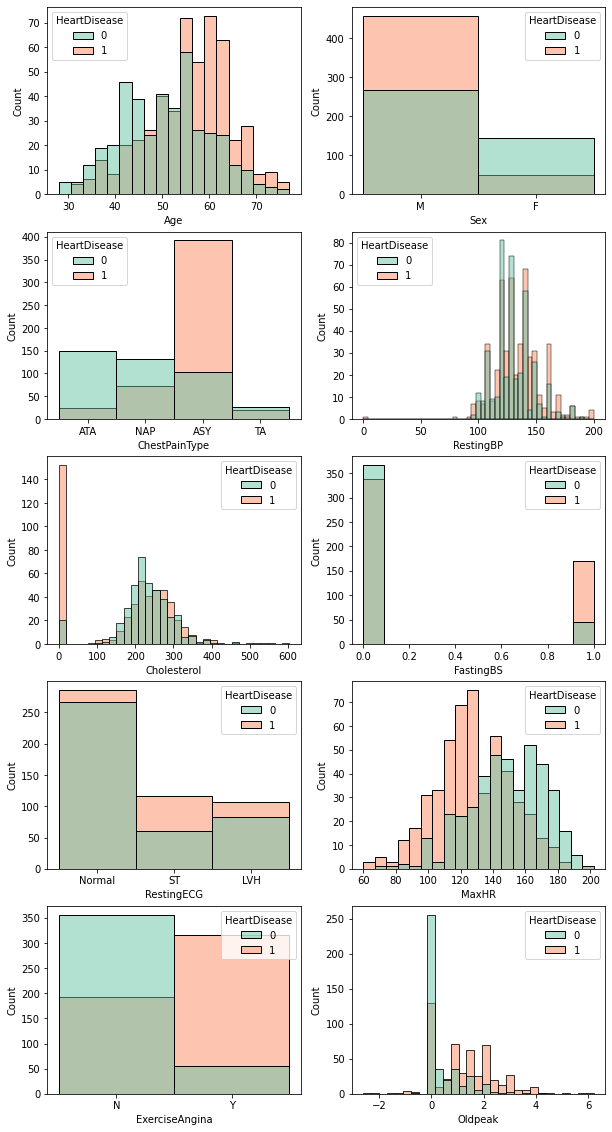

In [10]:

plt.figure(figsize=(10,20))

for i in range (10) :
  plt.subplot(5,2, i+1)
  sns.histplot(heart, x=columns[i], hue='HeartDisease', palette='Set2')
  plt.xlabel(columns[i])




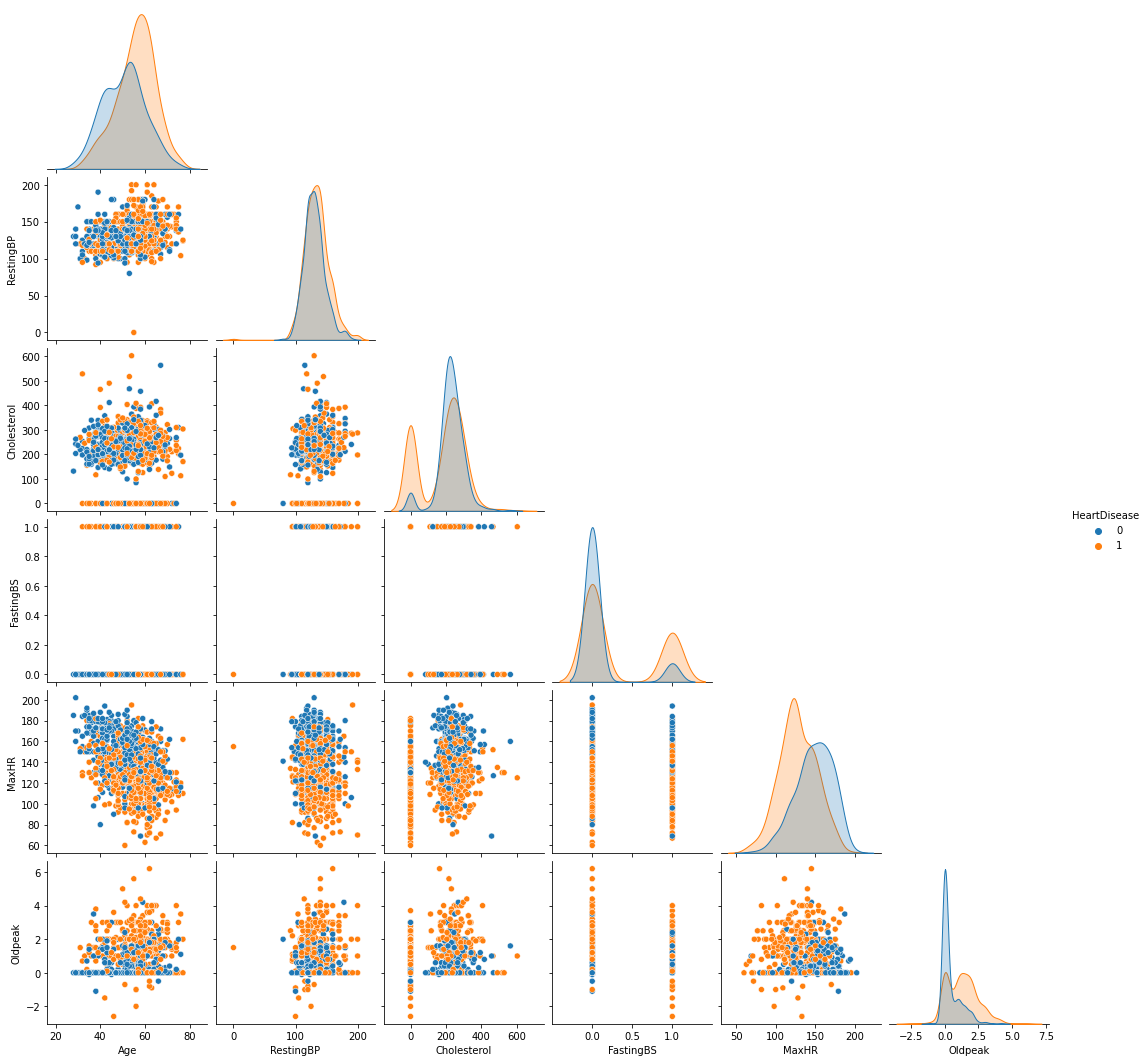

In [11]:
sns.pairplot(heart, hue="HeartDisease",corner=True);


In [12]:
object_col =heart.select_dtypes('object').columns
object_col

Index(['Sex', 'ChestPainType', 'RestingECG', 'ExerciseAngina', 'ST_Slope'], dtype='object')

In [13]:
heart.describe(include=object).T

,count,unique,top,freq
Sex,918,2,M,725
ChestPainType,918,4,ASY,496
RestingECG,918,3,Normal,552
ExerciseAngina,918,2,N,547
ST_Slope,918,3,Flat,460


In [14]:
df = pd.get_dummies(heart,columns =object_col, drop_first=True)
df

,Age,RestingBP,Cholesterol,FastingBS,MaxHR,Oldpeak,HeartDisease,Sex_M,ChestPainType_ATA,ChestPainType_NAP,ChestPainType_TA,RestingECG_Normal,RestingECG_ST,ExerciseAngina_Y,ST_Slope_Flat,ST_Slope_Up
0,40,140,289,0,172,0.0,0,1,1,0,0,1,0,0,0,1
1,49,160,180,0,156,1.0,1,0,0,1,0,1,0,0,1,0
2,37,130,283,0,98,0.0,0,1,1,0,0,0,1,0,0,1
3,48,138,214,0,108,1.5,1,0,0,0,0,1,0,1,1,0
4,54,150,195,0,122,0.0,0,1,0,1,0,1,0,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
913,45,110,264,0,132,1.2,1,1,0,0,1,1,0,0,1,0
914,68,144,193,1,141,3.4,1,1,0,0,0,1,0,0,1,0
915,57,130,131,0,115,1.2,1,1,0,0,0,1,0,1,1,0
916,57,130,236,0,174,0.0,1,0,1,0,0,0,0,0,1,0


In [15]:
heart['HeartDisease'].value_counts()

1    508
0    410
Name: HeartDisease, dtype: int64

In [16]:
heart[heart['HeartDisease']==0].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
Age,410.000000,50.551220,9.444915,28.000000,43.000000,51.000000,57.000000,76.000000
RestingBP,410.000000,130.180488,16.499585,80.000000,120.000000,130.000000,140.000000,190.000000
Cholesterol,410.000000,227.121951,74.634659,0.000000,197.250000,227.000000,266.750000,564.000000
FastingBS,410.000000,0.107317,0.309894,0.000000,0.000000,0.000000,0.000000,1.000000
MaxHR,410.000000,148.151220,23.288067,69.000000,134.000000,150.000000,165.000000,202.000000
Oldpeak,410.000000,0.408049,0.699709,-1.100000,0.000000,0.000000,0.600000,4.200000
HeartDisease,410.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [17]:
heart[heart['HeartDisease']==1].describe().T.style.background_gradient(subset=['mean','std','50%','count'])

,count,mean,std,min,25%,50%,75%,max
Age,508.000000,55.899606,8.727056,31.000000,51.000000,57.000000,62.000000,77.000000
RestingBP,508.000000,134.185039,19.828685,0.000000,120.000000,132.000000,145.000000,200.000000
Cholesterol,508.000000,175.940945,126.391398,0.000000,0.000000,217.000000,267.000000,603.000000
FastingBS,508.000000,0.334646,0.472332,0.000000,0.000000,0.000000,1.000000,1.000000
MaxHR,508.000000,127.655512,23.386923,60.000000,112.000000,126.000000,144.250000,195.000000
Oldpeak,508.000000,1.274213,1.151872,-2.600000,0.000000,1.200000,2.000000,6.200000
HeartDisease,508.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000


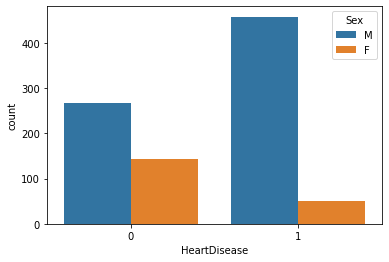

In [18]:
sns.countplot(data=heart,x='HeartDisease', hue='Sex')

- Sex difference in occurence of heart failure

# Label and features

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 918 entries, 0 to 917
Data columns (total 16 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Age                918 non-null    int64  
 1   RestingBP          918 non-null    int64  
 2   Cholesterol        918 non-null    int64  
 3   FastingBS          918 non-null    int64  
 4   MaxHR              918 non-null    int64  
 5   Oldpeak            918 non-null    float64
 6   HeartDisease       918 non-null    int64  
 7   Sex_M              918 non-null    uint8  
 8   ChestPainType_ATA  918 non-null    uint8  
 9   ChestPainType_NAP  918 non-null    uint8  
 10  ChestPainType_TA   918 non-null    uint8  
 11  RestingECG_Normal  918 non-null    uint8  
 12  RestingECG_ST      918 non-null    uint8  
 13  ExerciseAngina_Y   918 non-null    uint8  
 14  ST_Slope_Flat      918 non-null    uint8  
 15  ST_Slope_Up        918 non-null    uint8  
dtypes: float64(1), int64(6), u

In [20]:
X= df.drop('HeartDisease',axis=1)
y = df['HeartDisease']

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Building the classifier

1. Normalization  : MinMax Scaler / PowerTransformer

## Classifier type
There are a large number of possible classifiers to attempt, but 6 main types are chosen.

1. Logistic Regression
2. Random Forest
3. SVM : support vector machine
4. AdaBoost
6. GradientBoost
7. KNN


Additionally, each classifier will have hyperparameters tuned using gridsearch cv or some other manual search method.

## Evaluation
Accuracy, precision, recall, and F1 score will be calculated on test set for each model

In [22]:
import itertools

class_names = ['HF', 'Normal']
def plot_confusion_matrix1(cm, class_names, title=None):
    plt.figure()
    
    plt.title(title)
    plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    plt.colorbar()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], 'd'),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    # plt.tight_layout()
    plt.show()

In [23]:
# compare train set and test set 
def train_val(y_train, y_train_pred, y_test, y_pred):
    
    scores = {"train_set": {"Accuracy" : accuracy_score(y_train, y_train_pred),
                            "Precision" : precision_score(y_train, y_train_pred),
                            "Recall" : recall_score(y_train, y_train_pred),                          
                            "f1" : f1_score(y_train, y_train_pred)},
    
              "test_set": {"Accuracy" : accuracy_score(y_test, y_pred),
                           "Precision" : precision_score(y_test, y_pred),
                           "Recall" : recall_score(y_test, y_pred),                          
                           "f1" : f1_score(y_test, y_pred)}}
    
    return pd.DataFrame(scores)

## Logical Regression 

- unscaled
- scaled

In [77]:
scaler = MinMaxScaler()
# power = PowerTransformer(method='yeo-johnson')

X_train_sc = scaler.fit_transform(X_train)
X_test_sc = scaler.transform(X_test)


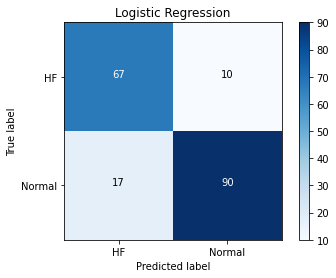

,train_set,test_set
Accuracy,0.869210,0.853261
Precision,0.869249,0.900000
Recall,0.895262,0.841121
f1,0.882064,0.869565


In [104]:
LR = LogisticRegression(max_iter=10000)
LR.fit(X_train, y_train)
y_pred = LR.predict(X_test)
y_train_pred = LR.predict(X_train)
LR_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(LR_cm, class_names, 'Logistic Regression')
train_val(y_train, y_train_pred, y_test, y_pred)

## Random Forest

In [62]:
%%time

param_grid = {'n_estimators':[50, 100, 300],
             'max_features':[2, 3, 4],
             'max_depth':[5, 7, 9],
             'criterion' :['gini', 'entropy']}

RF_grid = GridSearchCV(estimator=RandomForestClassifier(), 
                          param_grid=param_grid, 
                          scoring='accuracy', 
                          cv=5,
                       verbose=1)

RF_grid.fit(X_train_sc, y_train)





Fitting 5 folds for each of 54 candidates, totalling 270 fits
CPU times: user 1min 17s, sys: 524 ms, total: 1min 18s
Wall time: 1min 18s


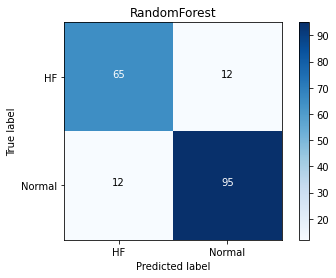

,train_set,test_set
Accuracy,0.960490,0.869565
Precision,0.960396,0.887850
Recall,0.967581,0.887850
f1,0.963975,0.887850


In [63]:

y_pred = RF_grid.predict(X_test_sc)
y_train_pred = RF_grid.predict(X_train_sc)

RF_grid_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(RF_grid_cm, class_names,'RandomForest' )
train_val(y_train, y_train_pred, y_test, y_pred)

In [64]:
RF_grid.best_params_

{'criterion': 'entropy', 'max_depth': 9, 'max_features': 2, 'n_estimators': 50}

### Check feature's importance with default RF model

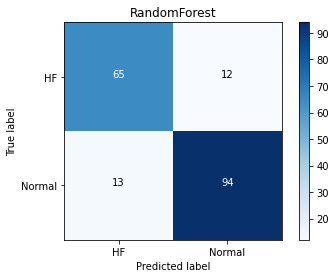

,train_set,test_set
Accuracy,1.0,0.864130
Precision,1.0,0.886792
Recall,1.0,0.878505
f1,1.0,0.882629


In [72]:
RF=RandomForestClassifier()
RF.fit(X_train_sc, y_train)
y_pred = RF.predict(X_test_sc)
y_train_pred= RF.predict(X_train_sc)

RF_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(RF_cm, class_names,'RandomForest' )
train_val(y_train, y_train_pred, y_test, y_pred)


In [73]:
RF_feature_imp = pd.DataFrame(index = X.columns, data = RF.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
RF_feature_imp

,Feature Importance
ST_Slope_Flat,0.131724
Oldpeak,0.125222
ST_Slope_Up,0.123364
MaxHR,0.110619
Cholesterol,0.102546
ExerciseAngina_Y,0.093013
Age,0.088603
RestingBP,0.072543
ChestPainType_ATA,0.036177
Sex_M,0.034808


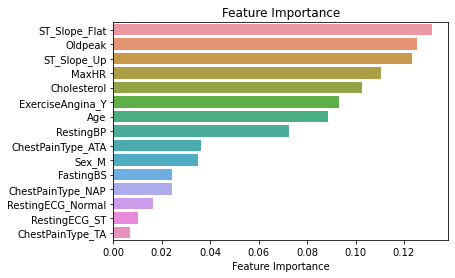

In [82]:
sns.barplot(x=RF_feature_imp['Feature Importance'], y=RF_feature_imp.index)
plt.title("Feature Importance")
plt.show()

## AdaBoost


In [32]:

param_grid = {"n_estimators": [ 20, 100, 500], 
              "learning_rate": [0.2, 0.5, 0.6, 0.75,1.0, 1.25, 1.5]}
    
Ada_grid = GridSearchCV(estimator=AdaBoostClassifier(), 
                          param_grid=param_grid, 
                          cv=5,
                       verbose=1)

Ada_grid.fit(X_train_sc, y_train)


Fitting 5 folds for each of 21 candidates, totalling 105 fits


GridSearchCV(cv=5, estimator=AdaBoostClassifier(),
             param_grid={'learning_rate': [0.2, 0.5, 0.6, 0.75, 1.0, 1.25, 1.5],
                         'n_estimators': [20, 100, 500]},
             verbose=1)

In [95]:
Ada_grid.best_estimator_

AdaBoostClassifier(learning_rate=0.6, n_estimators=20)

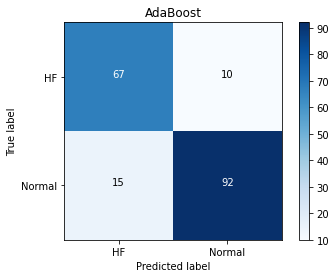

,train_set,test_set
Accuracy,0.874659,0.864130
Precision,0.879607,0.901961
Recall,0.892768,0.859813
f1,0.886139,0.880383


In [33]:
y_pred = Ada_grid.predict(X_test_sc)
y_train_pred = Ada_grid.predict(X_train_sc)

Ada_grid_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(Ada_grid_cm, class_names, 'AdaBoost')
train_val(y_train, y_train_pred, y_test, y_pred)

In [96]:
Ada_grid.best_estimator_.feature_importances_

array([0.05, 0.  , 0.15, 0.05, 0.1 , 0.1 , 0.1 , 0.1 , 0.1 , 0.05, 0.  ,
       0.  , 0.05, 0.1 , 0.05])

## SCV : Support Vector Machine

In [87]:
scaler = MinMaxScaler()
pipe_model = SVC(C = 15, gamma='auto') #test!!
pipe_svc_model = Pipeline(steps=[('s', scaler), ('m', pipe_model)])

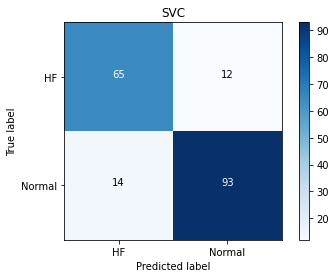

,train_set,test_set
Accuracy,0.881471,0.858696
Precision,0.865116,0.885714
Recall,0.927681,0.869159
f1,0.895307,0.877358


In [88]:
pipe_svc_model.fit(X_train, y_train)
ypred_svc = pipe_svc_model.predict(X_test)
ypred_svc_train= pipe_svc_model.predict(X_train)
svc_cm= confusion_matrix(y_test, ypred_svc)

plot_confusion_matrix1(svc_cm, class_names,'SVC' )
train_val(y_train, ypred_svc_train, y_test, ypred_svc)

In [36]:

param_grid = {'C': [1, 10, 100, 300],
              'gamma': ["auto", 1,0.1,0.01],
              'kernel': ['rbf', 'linear']}

SVC_grid_model = GridSearchCV(SVC(random_state=42), param_grid, verbose=1, refit=True)

In [91]:

SVC_grid_model.fit(X_train_sc, y_train)

Fitting 5 folds for each of 32 candidates, totalling 160 fits


GridSearchCV(estimator=SVC(random_state=42),
             param_grid={'C': [1, 10, 100, 300],
                         'gamma': ['auto', 1, 0.1, 0.01],
                         'kernel': ['rbf', 'linear']},
             verbose=1)

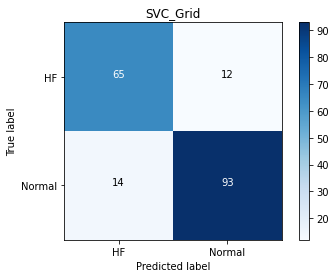

,train_set,test_set
Accuracy,0.881471,0.864130
Precision,0.865116,0.886792
Recall,0.927681,0.878505
f1,0.895307,0.882629


In [92]:

ypred_svc_grid = SVC_grid_model.predict(X_test_sc)
ypred_svc_train_grid= SVC_grid_model.predict(X_train_sc)
svc_grid_cm= confusion_matrix(y_test, ypred_svc)


plot_confusion_matrix1(svc_grid_cm, class_names,'SVC_Grid' )

train_val(y_train, ypred_svc_train_grid, y_test, ypred_svc_grid)

## GradientBoost 

In [124]:

param_grid = {"n_estimators":[100, 200, 300],
              "learning_rate": [0.01, 0.1, 0.2, 0.5, 0.6, 0.75, 0.85, 1.0, 1.25, 1.5]}  

GB_grid = GridSearchCV(estimator=GradientBoostingClassifier(), 
                          param_grid=param_grid, 
                          cv=5,
                       verbose=1)

GB_grid.fit(X_train_sc, y_train)



Fitting 5 folds for each of 30 candidates, totalling 150 fits


GridSearchCV(cv=5, estimator=GradientBoostingClassifier(),
             param_grid={'learning_rate': [0.01, 0.1, 0.2, 0.5, 0.6, 0.75, 0.85,
                                           1.0, 1.25, 1.5],
                         'n_estimators': [100, 200, 300]},
             verbose=1)

In [125]:
GB_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)

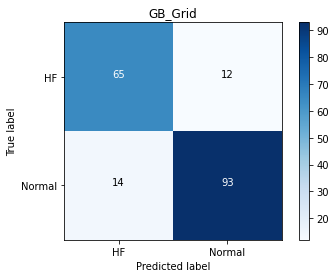

,train_set,test_set
Accuracy,0.904632,0.880435
Precision,0.891253,0.897196
Recall,0.940150,0.897196
f1,0.915049,0.897196


In [126]:

ypred_gb_grid = GB_grid.predict(X_test_sc)
ypred_gb_train_grid= GB_grid.predict(X_train_sc)
GB_grid_cm= confusion_matrix(y_test, ypred_svc)

plot_confusion_matrix1(GB_grid_cm, class_names,'GB_Grid' )
train_val(y_train, ypred_gb_train_grid, y_test, ypred_gb_grid)

In [127]:
GB_grid.best_estimator_.feature_importances_


array([0.02924561, 0.01967571, 0.07252333, 0.02827858, 0.04983927,
       0.07404801, 0.05977084, 0.01318095, 0.01890819, 0.00111207,
       0.        , 0.        , 0.09245619, 0.01162035, 0.5293409 ])

In [128]:
GB_feature_imp = pd.DataFrame(index = X.columns, data = GB_grid.best_estimator_.feature_importances_,
                              columns = ["Feature Importance"]).sort_values("Feature Importance", ascending = False)
GB_feature_imp

,Feature Importance
ST_Slope_Up,0.529341
ExerciseAngina_Y,0.092456
Oldpeak,0.074048
Cholesterol,0.072523
Sex_M,0.059771
MaxHR,0.049839
Age,0.029246
FastingBS,0.028279
RestingBP,0.019676
ChestPainType_NAP,0.018908


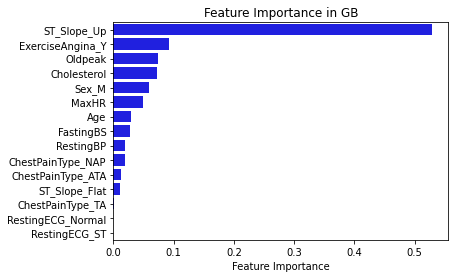

In [129]:
sns.barplot(x=GB_feature_imp['Feature Importance'], y= GB_feature_imp.index, color='Blue')
plt.title('Feature Importance in GB')
plt.show()


### Handle the outlier feature

In [130]:
X_dr=df.drop({'HeartDisease','ST_Slope_Up'}, axis=1)
X_train_dr, X_test_dr, y_train, y_test = train_test_split(X_dr, y, test_size=0.2, random_state=42)


X_train_dr_sc =scaler.fit_transform(X_train_dr)
X_test_dr_sc = scaler.transform(X_test_dr)

In [140]:
GB_grid.best_estimator_

GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)

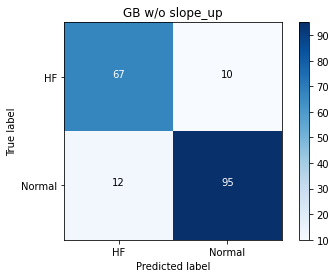

,train_set,test_set
Accuracy,0.907357,0.880435
Precision,0.897375,0.904762
Recall,0.937656,0.887850
f1,0.917073,0.896226


In [141]:
GB_dr= GradientBoostingClassifier(learning_rate=0.01, n_estimators=300)
GB_dr.fit(X_train_dr_sc, y_train)
y_pred = GB_dr.predict(X_test_dr_sc)
y_train_pred = GB_dr.predict(X_train_dr_sc)

GB_dr_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(GB_dr_cm, class_names, 'GB w/o slope_up')

train_val(y_train, y_train_pred, y_test, y_pred)

## XGBoost

XGBoost is an optimized distributed gradient boosting library designed to be highly efficient, flexible and portable. It implements machine learning algorithms under the Gradient Boosting framework. XGBoost provides a parallel tree boosting (also known as GBDT, GBM) that solve many data science problems in a fast and accurate way. The same code runs on major distributed environment (Hadoop, SGE, MPI) and can solve problems beyond billions of examples.

- Use droped features used for GB

In [179]:
param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [100, 300], 'subsample': [0.5, 1]}
XGB_grid = GridSearchCV(estimator=XGBClassifier(), param_grid=param_grid, cv=5, verbose=1)

XGB_grid.fit(X_train_sc, y_train)



Fitting 5 folds for each of 48 candidates, totalling 240 fits


GridSearchCV(cv=5, estimator=XGBClassifier(),
             param_grid={'colsample_bytree': [0.5, 1],
                         'learning_rate': [0.1, 0.3], 'max_depth': [3, 5, 6],
                         'n_estimators': [100, 300], 'subsample': [0.5, 1]},
             verbose=1)

In [180]:
XGB_grid.best_estimator_

XGBClassifier(colsample_bytree=0.5, max_depth=5)

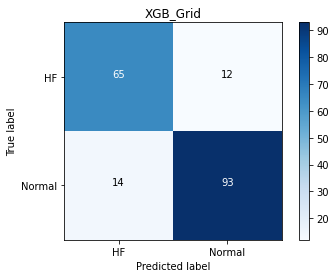

,train_set,test_set
Accuracy,0.975477,0.885870
Precision,0.970516,0.905660
Recall,0.985037,0.897196
f1,0.977723,0.901408


In [181]:
ypred_gb_grid = XGB_grid.predict(X_test_sc)
ypred_gb_train_grid= XGB_grid.predict(X_train_sc)
XGB_grid_cm= confusion_matrix(y_test, ypred_svc)

plot_confusion_matrix1(XGB_grid_cm, class_names,'XGB_Grid' )
train_val(y_train, ypred_gb_train_grid, y_test, ypred_gb_grid)

In [176]:
XGB_grid.best_estimator_.feature_importances_

XGB_imp = pd.DataFrame(index=X.columns, data= XGB_grid.best_estimator_.feature_importances_, columns=['Feature_Importances']).sort_values('Feature_Importances',ascending=False)

XGB_imp

,Feature_Importances
ST_Slope_Up,0.432773
ExerciseAngina_Y,0.144384
ST_Slope_Flat,0.096325
Sex_M,0.059236
ChestPainType_ATA,0.052310
Oldpeak,0.035262
ChestPainType_NAP,0.028775
FastingBS,0.028530
ChestPainType_TA,0.023410
Cholesterol,0.022798


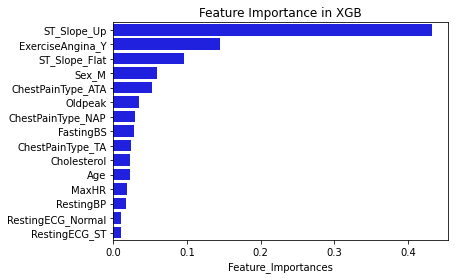

In [182]:
sns.barplot(x=XGB_imp['Feature_Importances'], y = XGB_imp.index, color='Blue')
plt.title('Feature Importance in XGB')
plt.show()

- features w/o slope-up

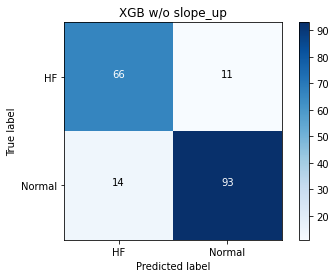

,train_set,test_set
Accuracy,0.978202,0.864130
Precision,0.970660,0.894231
Recall,0.990025,0.869159
f1,0.980247,0.881517


In [183]:
XGB_dr= XGB_grid.best_estimator_

XGB_dr.fit(X_train_dr_sc, y_train)
y_pred = XGB_dr.predict(X_test_dr_sc)
y_train_pred = XGB_dr.predict(X_train_dr_sc)

XGB_dr_cm = confusion_matrix(y_test, y_pred)

plot_confusion_matrix1(XGB_dr_cm, class_names, 'XGB w/o slope_up')

train_val(y_train, y_train_pred, y_test, y_pred)

## Comparison


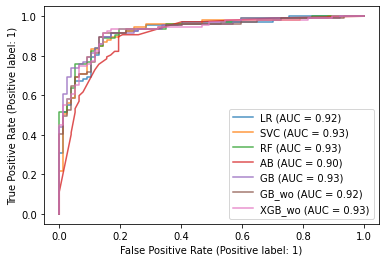

In [185]:
from sklearn.metrics import RocCurveDisplay
ax = plt.gca()
LR_disp = RocCurveDisplay.from_estimator(pipe_log_model, X_test, y_test, ax=ax, alpha=0.8,name='LR')
SVC_disp = RocCurveDisplay.from_estimator(SVC_grid_model, X_test_sc, y_test, ax=ax, alpha=0.8,name='SVC')
RF_disp = RocCurveDisplay.from_estimator(RF_grid, X_test_sc, y_test, ax=ax, alpha=0.8,name='RF')
AB_disp = RocCurveDisplay.from_estimator(Ada_grid, X_test_sc, y_test, ax=ax, alpha=0.8,name='AB')
GB_disp = RocCurveDisplay.from_estimator(GB_grid, X_test_sc, y_test, ax=ax, alpha=0.8,name='GB')
GB_disp_wo = RocCurveDisplay.from_estimator(GB_dr, X_test_dr_sc, y_test, ax=ax, alpha=0.8,name='GB_wo')
# XGB_disp = RocCurveDisplay.from_estimator(XGB_grid, X_test_sc, y_test, ax=ax, alpha=0.8,name='XGB')
XGB_disp_wo = RocCurveDisplay.from_estimator(XGB_dr, X_test_dr_sc, y_test, ax=ax, alpha=0.8,name='XGB_wo')
plt.show()